In [47]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import altair as alt

The `formula` module provides the `ols` function which creates a model object for ordinary least squares. There is a `summary` function like in R. It takes a formula and a dataframe and does not add a constant, so you need to do that yourself.

There is documentation on the graphics provided by [`statsmodels` here](https://www.statsmodels.org/stable/graphics.html), but be careful because the documentation seems patchy. Still it is probably a good idea to get the students to write their own diagnostic plots so that they understand what they mean and get some more practise plotting.

In [64]:
x = pd.DataFrame(
    {
        "x0": [1 for _ in range(10)],
        "x1": range(10),
        "y": [0,2.4,2.3,4,4,13,6,8,8,10]
    }
)

(alt
 .Chart(x)
 .mark_point(size = 50)
 .encode(x = alt.X("x1", title = "X"), 
         y = alt.Y("y", title = "Y")))

alt.Chart(...)

In [44]:
lm = smf.ols("y ~ x0 + x1", x).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     13.71
Date:                Mon, 26 Oct 2020   Prob (F-statistic):            0.00602
Time:                        22:03:34   Log-Likelihood:                -22.503
No. Observations:                  10   AIC:                             49.01
Df Residuals:                       8   BIC:                             49.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5300      0.755      0.702      0.502      -1.210       2.270
x0             0.5300      0.755      0.702      0.502      -1.210       2.270
x1             1.0467      0.283      3.703      0.006       0.395       1.699
==============================================================================
Omnibus:                       24.708   Durbin-Watson:                   2.571
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.473
Skew:                           2.414   Prob(JB):                     0.000161
Kurtosis:                       7.315   Cond. No.                     2.26e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.87e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

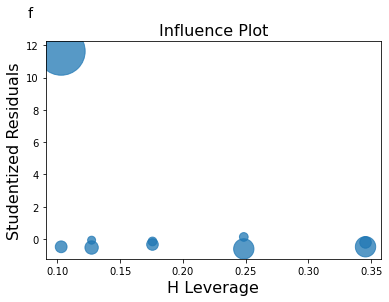

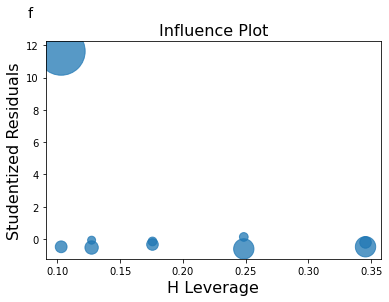

In [36]:
sm.graphics.influence_plot(lm, criterion="cooks")


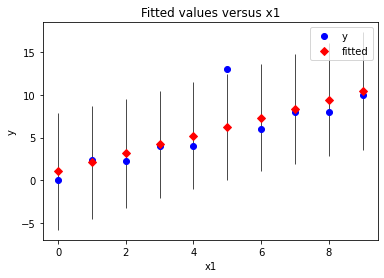

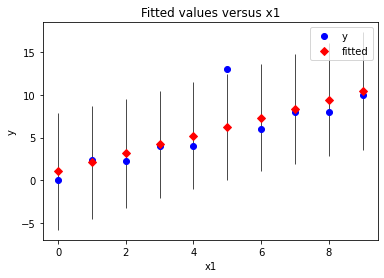

In [39]:
sm.graphics.plot_fit(lm, "x1")